# Lib 로딩과 데이터 로딩

In [1]:
import pandas as pd
import numpy as np

In [2]:
# datas_ml/Salary_Data.csv
data_path = 'datas_ml/Salary_Data.csv'
df = pd.read_csv(data_path)
df.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
# 결측치 확인 방법1
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [4]:
# 결측치 확인 방법2
df.isna().sum()

YearsExperience    0
Salary             0
dtype: int64

## [목표] 경력에 따른 연봉을 예측하고 싶음


In [5]:
df.columns

Index(['YearsExperience', 'Salary'], dtype='object')

In [6]:
#  종속변수 (target, label)
y = df['Salary']
y.head()

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [7]:
# 독립변수(feature)
X = df['YearsExperience']
X.head()

0    1.1
1    1.3
2    1.5
3    2.0
4    2.2
Name: YearsExperience, dtype: float64

In [8]:
# 1D 시리즈 -> 2d df 로 변환 <= 머신러닝에 넣기 위해
X = X.to_frame()

In [9]:
# 머신러닝은 X(독립변수) 1개 여도, 2D 여야함.

# 피처스케일링
- 독립변수가 1개여서 할 필요가 없음
- 스케일링이 필요할 때
    - 피처의 스케일 차이가 너무 크면
    - 수치 불안정 → 계산 느림 → 가중치 해석 어려움

# train, test 데이터로 분할

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
train_test_split(X, y, test_size=0.2)

[    YearsExperience
 16              5.1
 0               1.1
 5               2.9
 6               3.0
 19              6.0
 23              8.2
 13              4.1
 26              9.5
 27              9.6
 2               1.5
 28             10.3
 7               3.2
 9               3.7
 21              7.1
 10              3.9
 24              8.7
 11              4.0
 17              5.3
 12              4.0
 4               2.2
 20              6.8
 14              4.5
 29             10.5
 22              7.9,
     YearsExperience
 8               3.2
 1               1.3
 15              4.9
 3               2.0
 25              9.0
 18              5.9,
 16     66029.0
 0      39343.0
 5      56642.0
 6      60150.0
 19     93940.0
 23    113812.0
 13     57081.0
 26    116969.0
 27    112635.0
 2      37731.0
 28    122391.0
 7      54445.0
 9      57189.0
 21     98273.0
 10     63218.0
 24    109431.0
 11     55794.0
 17     83088.0
 12     56957.0
 4      39891.0
 20   

In [12]:
# 리턴값을 받는 변수 순서 중요
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 모델 학습하기

## AI 모델 객체 생성

In [13]:
# 예측값이 연봉(실수값 ) -> 회귀 문제
from sklearn.linear_model import LinearRegression

In [14]:
# 빈깡통 AI
lr_model = LinearRegression()
lr_model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [15]:
# 학습 되기 전의 기울기<- 정상적인 오류
lr_model.coef_

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [16]:
# 학습 되기 전의 절편 <- 정상적인 오류
lr_model.intercept_

AttributeError: 'LinearRegression' object has no attribute 'intercept_'

## 학습하기

In [17]:
# lr_model.fit(학습문제, 학습정답)
lr_model.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [18]:
#  w (기울기)
lr_model.coef_

array([9704.19122719])

In [19]:
#  b (절편)
lr_model.intercept_

np.float64(23748.02849934325)

# 모델 테스트

In [20]:
# 테스트 데이터를 넣어, 결과 예측하기

In [21]:
y_pred = lr_model.predict(X_test)
y_pred

array([45097.24919916, 54801.44042636, 34422.63884925, 36363.47709469,
       75180.24200346, 67416.88902171])

In [22]:
y_test

4     39891.0
8     64445.0
0     39343.0
1     46205.0
17    83088.0
14    61111.0
Name: Salary, dtype: float64

# 모델 평가
- 모델이 테스트한 결과(y_pred)와 실제값(y_test)의 오차의 제곱, 합의 평균 계산

In [23]:
#  오차 제곱
(y_test - y_pred)**2

4     2.710503e+07
8     9.299824e+07
0     2.420995e+07
1     9.685557e+07
17    6.253264e+07
14    3.976424e+07
Name: Salary, dtype: float64

In [40]:
# 오차 : error의 제곱을 합한 후 데이터의 갯수로 나눔<- 오차제곱을 구한후 평균 구함 (MSE)
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, y_pred)
mse

57244278.63493606

In [41]:
# RMSE (MSE는 너무크기 때문에 RMS구함.)
np.sqrt(((y_test - y_pred)**2).mean())

np.float64(7565.994887318921)

- MAE

In [34]:
# MAE
from sklearn.metrics import mean_absolute_error

In [36]:
mae = mean_absolute_error(y_test, y_pred)
mae

7304.223307851498

- R2-score 계산

In [35]:
#  R2-score 계산
from sklearn.metrics import r2_score

In [37]:
round(r2_score(y_test, y_pred), 2)

0.77

# 오차를 시각적으로 확인하기

In [26]:
df_test =y_test.to_frame()
df_test

,Salary
4,39891.0
8,64445.0
0,39343.0
1,46205.0
17,83088.0
14,61111.0


In [27]:
df_test['y_pred'] = y_pred

In [28]:
df_test

,Salary,y_pred
4,39891.0,45097.249199
8,64445.0,54801.440426
0,39343.0,34422.638849
1,46205.0,36363.477095
17,83088.0,75180.242003
14,61111.0,67416.889022


## 실제값과 예측값의 차이 시각화

In [29]:
# 한글 깨짐 해결
import matplotlib.pyplot as plt
import matplotlib as mpl

plt.rc('font', family='Malgun Gothic')  # Windows 기본 한글 폰트
plt.rc('axes', unicode_minus=False)     # 마이너스 깨짐 방지

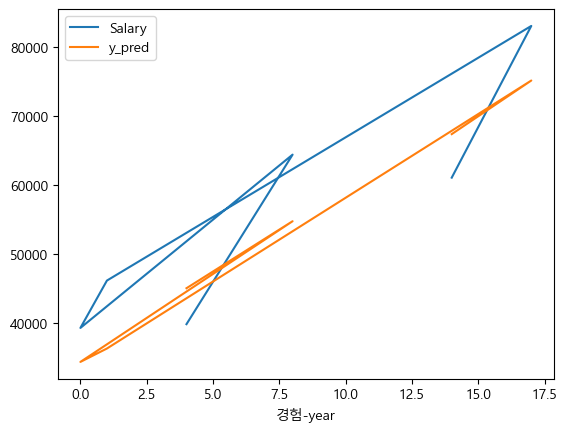

In [30]:
# 근무 년수에 따른 연봉 
df_test.plot(kind='line')
plt.xlabel('경험-year')
plt.show()

In [31]:
# index reset하기
df_test = df_test.reset_index(drop=True)
df_test

,Salary,y_pred
0,39891.0,45097.249199
1,64445.0,54801.440426
2,39343.0,34422.638849
3,46205.0,36363.477095
4,83088.0,75180.242003
5,61111.0,67416.889022


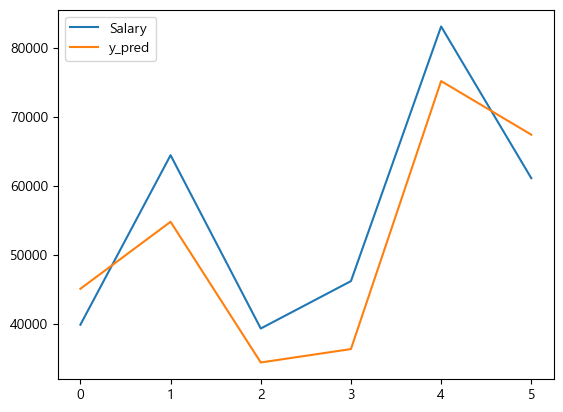

In [32]:
# 근무 년수에 따른 연봉 (꺽은선 그래프)
df_test.plot(kind= 'line')
plt.show()

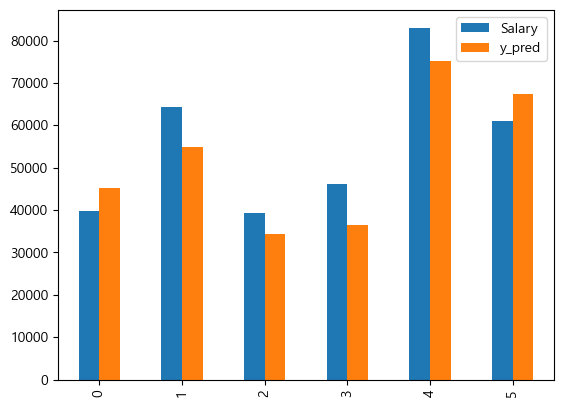

In [33]:
# 근무 년수에 따른 연봉 (막대그래프)
df_test.plot(kind= 'bar')
plt.show()

# 일반화

In [52]:
# 수집한 데이터셋의 데이터가 아닌 현실 데이터를 넣어서 테스트
# my_data = [5, 10]  연봉 예측
# 방법2
my_data = [[5], [10]]
my_data = np.array(my_data) # 2차원 배열 형태 필수

In [55]:
my_data = my_data.reshape(-1, 1)

In [60]:
pred_salary = lr_model.predict(my_data)

C:\Users\Admin\miniconda3\envs\eda_env\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [61]:
print(pred_salary)

[ 72268.9846353  120789.94077126]


In [48]:
# 예측할 값 (근무연수 5년, 10년)
my_data = pd.DataFrame({'YearsExperience': [5, 10]})

y_new = lr_model.predict(my_data)
print(y_new)

[ 72268.9846353  120789.94077126]


In [51]:
my_data = [5, 10] #연봉 예측, 2명의 데이터

In [ ]:
my_data.to